# Chapter 3.3: Maricopa County's Estimated Infections and Rate of Detection

In [1]:
import pandas as pd
import requests
import numpy as np
import matplotlib.pyplot as plt
from functions import clean_deaths, clean_cases

In [2]:
deaths_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_US.csv')

In [3]:
deaths_df = clean_deaths(deaths_df)

In [4]:
cases_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv')

In [5]:
cases_df = clean_cases(cases_df)

In [6]:
deaths_df_MC = deaths_df.iloc[103,:]
deaths_df_MC = deaths_df_MC.reset_index()

In [7]:
cases_df_MC = cases_df.iloc[103,:]
cases_df_MC = cases_df_MC.reset_index()
index_val = len(cases_df_MC.index)

In [8]:
for ind in deaths_df_MC.index:
    if (int(ind)+18) > index_val-1:
        deaths_df_MC.loc[ind, 'total_infections'] = 0
    else:
        deaths_df_MC.loc[ind, 'total_infections'] = deaths_df_MC.iloc[ind+18, 1] * 100

In [9]:
deaths_df_MC = deaths_df_MC[0:-18]

In [10]:
merged_df_MC = pd.merge(deaths_df_MC, cases_df_MC, on = 'index', suffixes = ['_deaths', '_cases'])

In [11]:
merged_df_MC['detection_rate'] = merged_df_MC['103_cases'] / merged_df_MC['total_infections']

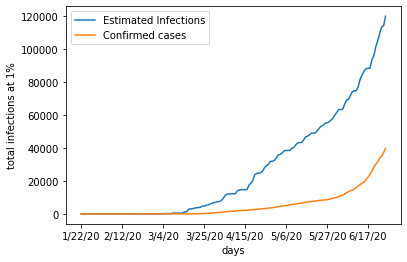

In [12]:
fig, ax = plt.subplots()
ax.plot(merged_df_MC['index'], merged_df_MC['total_infections'], label='Estimated Infections')
ax.plot(merged_df_MC['index'], merged_df_MC['103_cases'], label='Confirmed cases')
ax.set_xlabel('days')
ax.set_ylabel('total infections at 1%')
plt.xticks(np.arange(0, 151, step=21)) 
ax.legend()

This graph displays Maricopa's estimated number of infeections, calculated with death counts and a death rate of 1%, and the the number of confimred cases of COVID 19.

In [13]:
merged_df_MC = merged_df_MC[55:-1]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x115f0ef10>]],
      dtype=object)

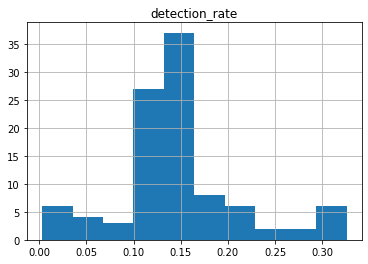

In [14]:
merged_df_MC.hist(column='detection_rate', bins=10)

To determine the average detection rate in Maricopa county, the number of reported cases is divided by it's esetimated counterpart for each date. As displayed in the histogram, Maricopa appears to detect approximately 10-20% of all COVID 19 cases. 

In [15]:
merged_df_MC['detection_cases'] = merged_df_MC['103_cases'] / 0.2

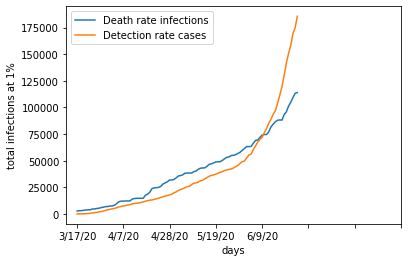

In [16]:
fig, ax2 = plt.subplots()
ax2.plot(merged_df_MC['index'], merged_df_MC['total_infections'], label='Death rate infections')
ax2.plot(merged_df_MC['index'], merged_df_MC['detection_cases'], label='Detection rate cases')
ax2.set_xlabel('days')
ax2.set_ylabel('total infections at 1%')
plt.xticks(np.arange(0, 151, step=21)) 
ax2.legend()

Maricopa’s detection rate ranges from approximately 10-20%. Applying these detection rates to confirmed cases would produce another infection estimate, but this metric would incorporate a variable not directly produced by death counts. By cross validating a detection-rate based infection-estimate with the death-rate based infection-estimate, the validity of both estimation methods can be evaluated. In this graph I chose a conservative 20% detection rate, and divided confirmed cases by that decimal aproximation. To cross validate for accuracy, the detection rate cases are compared to the original infection estimation based on a 1% death rate and reported deaths. 